# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Мы хотим определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Описание данных<br>
`airports_nearest`— расстояние до ближайшего аэропорта в метрах (м)<br>
`balcony` — число балконов<br>
`ceiling_height` — высота потолков (м)<br>
`cityCenters_nearest` — расстояние до центра города (м)<br>
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
`first_day_exposition` — дата публикации<br>
`floor` — этаж<br>
`floors_total` — всего этажей в доме<br>
`is_apartment` — апартаменты (булев тип)<br>
`kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
`last_price` — цена на момент снятия с публикации<br>
`living_area` — жилая площадь в квадратных метрах (м²)<br>
`locality_name` — название населённого пункта<br>
`open_plan` — свободная планировка (булев тип)<br>
`parks_around3000` — число парков в радиусе 3 км<br>
`parks_nearest` — расстояние до ближайшего парка (м)<br>
`ponds_around3000` — число водоёмов в радиусе 3 км<br>
`ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
`rooms` — число комнат<br>
`studio` — квартира-студия (булев тип)<br>
`total_area` — общая площадь квартиры в квадратных метрах (м²)<br>
`total_images` — число фотографий квартиры в объявлении<br>

### План работы:<br>
* загрузить данные и посмотреть общую информацию.
* обработать пропущенные значения, привести столбцы к нужному типу данных обработать дубликаты.
* добавить новые столбцы, необходимые для анализа.
* провести исследовательский анализ данных.

### Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={'figure.figsize':(16, 9)})
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('data/real_estate_data.csv', sep='\t')

In [4]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10581,8,5200000.0,58.00,2017-10-08T00:00:00,3,2.57,10.0,38.0,1,NaN,False,False,NaN,NaN,Санкт-Петербург,36209.0,13123.0,0.0,NaN,0.0,NaN,100.0
13099,6,800000.0,52.00,2017-02-15T00:00:00,2,NaN,3.0,30.0,1,NaN,False,False,8.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,77.0
17686,5,2900000.0,32.20,2018-03-13T00:00:00,1,2.50,17.0,14.0,9,NaN,False,False,8.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,278.0
8210,16,11400000.0,92.00,2017-11-27T00:00:00,3,NaN,24.0,55.0,5,NaN,False,False,13.0,2.0,Санкт-Петербург,11555.0,12099.0,0.0,NaN,1.0,527.0,24.0
9361,20,5900000.0,112.00,2015-03-29T00:00:00,4,NaN,5.0,76.4,4,False,False,False,9.5,3.0,Красное Село,26645.0,30070.0,0.0,NaN,0.0,NaN,714.0
20610,20,8548000.0,60.44,2017-08-13T00:00:00,2,NaN,16.0,33.4,14,NaN,False,False,15.1,2.0,Санкт-Петербург,18948.0,4297.0,0.0,NaN,1.0,955.0,19.0
8131,9,3600000.0,45.00,2018-09-19T00:00:00,2,2.50,5.0,31.6,2,NaN,False,False,5.1,1.0,Санкт-Петербург,17115.0,16118.0,1.0,615.0,1.0,809.0,36.0
3619,11,1600000.0,34.00,2018-04-01T00:00:00,1,2.60,5.0,18.2,2,NaN,False,False,6.5,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,195.0
2337,18,2850000.0,30.40,2019-01-13T00:00:00,1,NaN,5.0,17.2,5,NaN,False,False,5.4,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,52.0
19414,15,7999999.0,54.70,2018-07-26T00:00:00,1,2.70,9.0,17.5,8,NaN,False,False,14.0,2.0,Санкт-Петербург,30947.0,8319.0,0.0,NaN,2.0,231.0,14.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Как мы можем увидеть во многих столбцах мы имеем пропуски и нам необходимо столбец `first_day_exposition` перевести в формат даты.**

#### Построим гистограммы числовых признаков

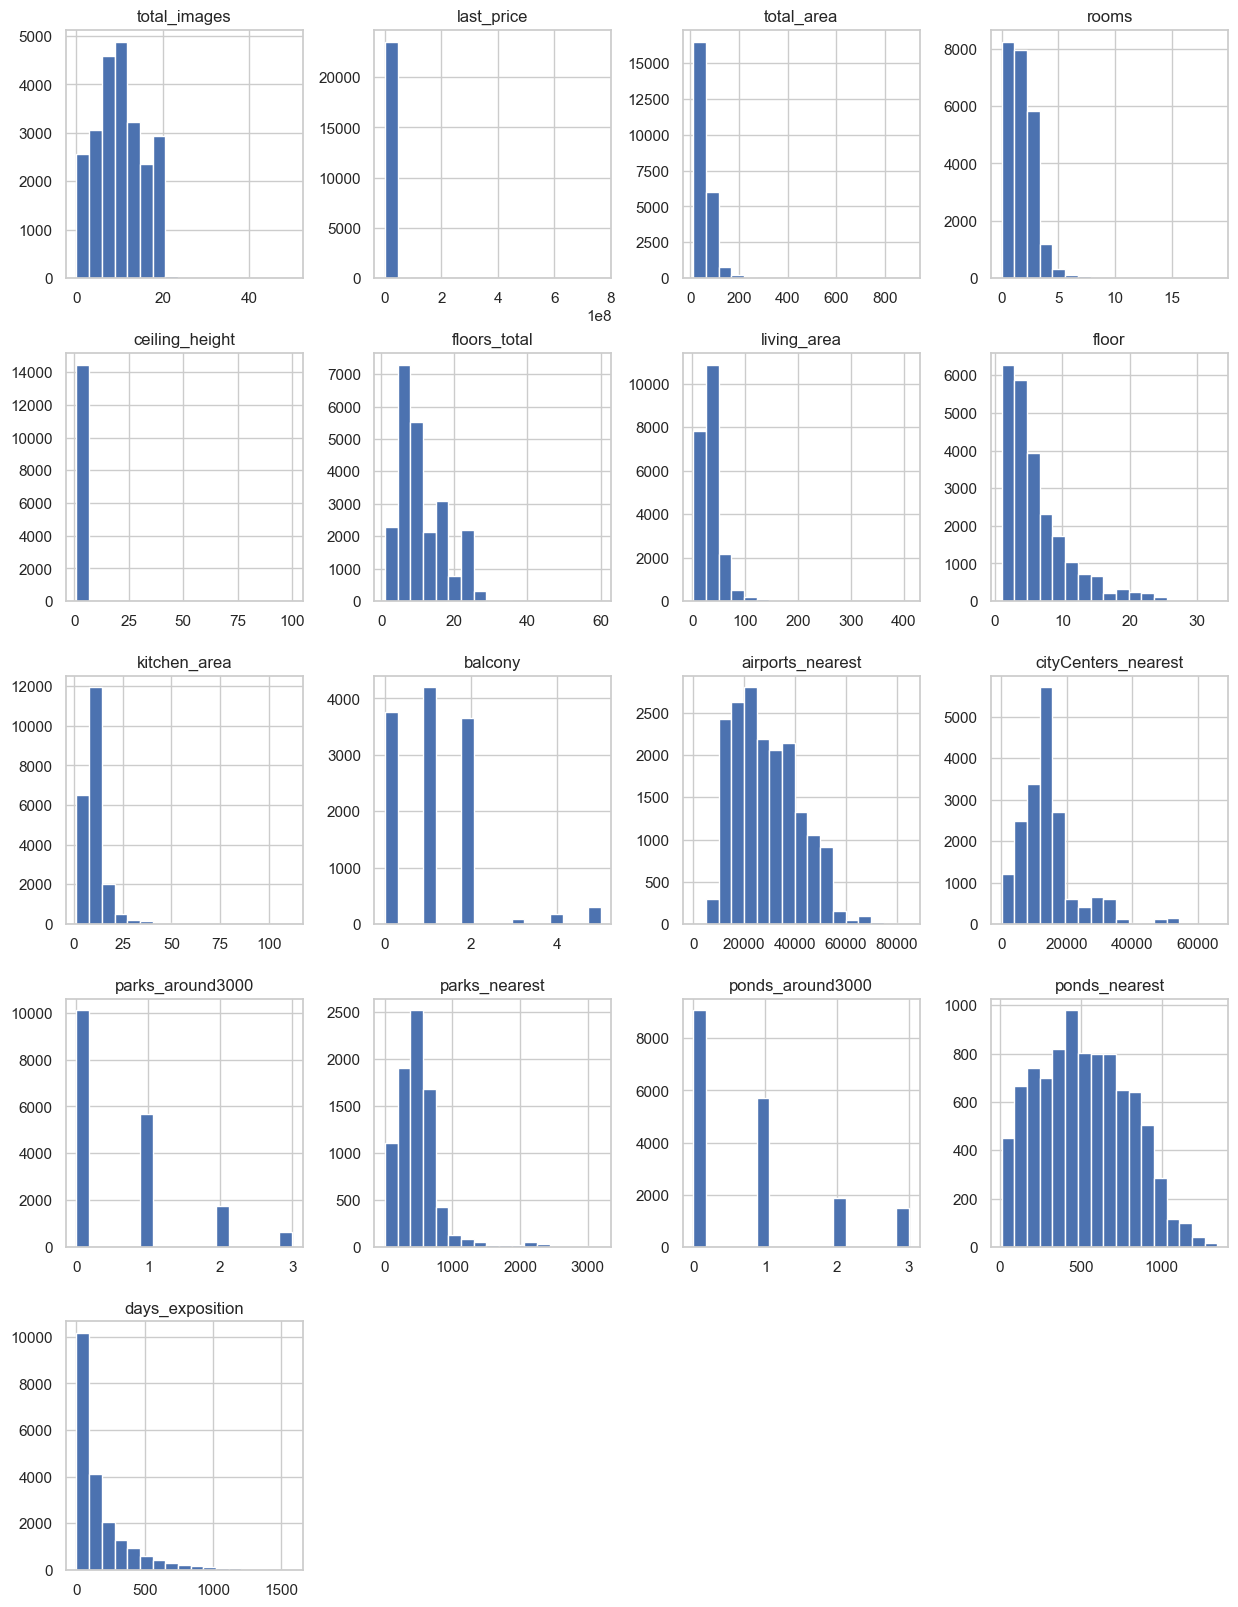

In [6]:
data.hist(figsize=(15, 20), bins=17)
plt.show()

**Мы имеем аномально высокие значения `ceiling_height` и выбросы в `last_price`, `total_area`, `rooms`, `living_area`, `kitchen_area`, `days_exposition`, необходимо дополнительно изучить их распределение.**

### Предобработка данных

#### Пропущенные значения

#### Посмотрим долю пропущенных значений в каждом столбце

In [7]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

#### Визуализируем распределение пропущенных значений по выборке

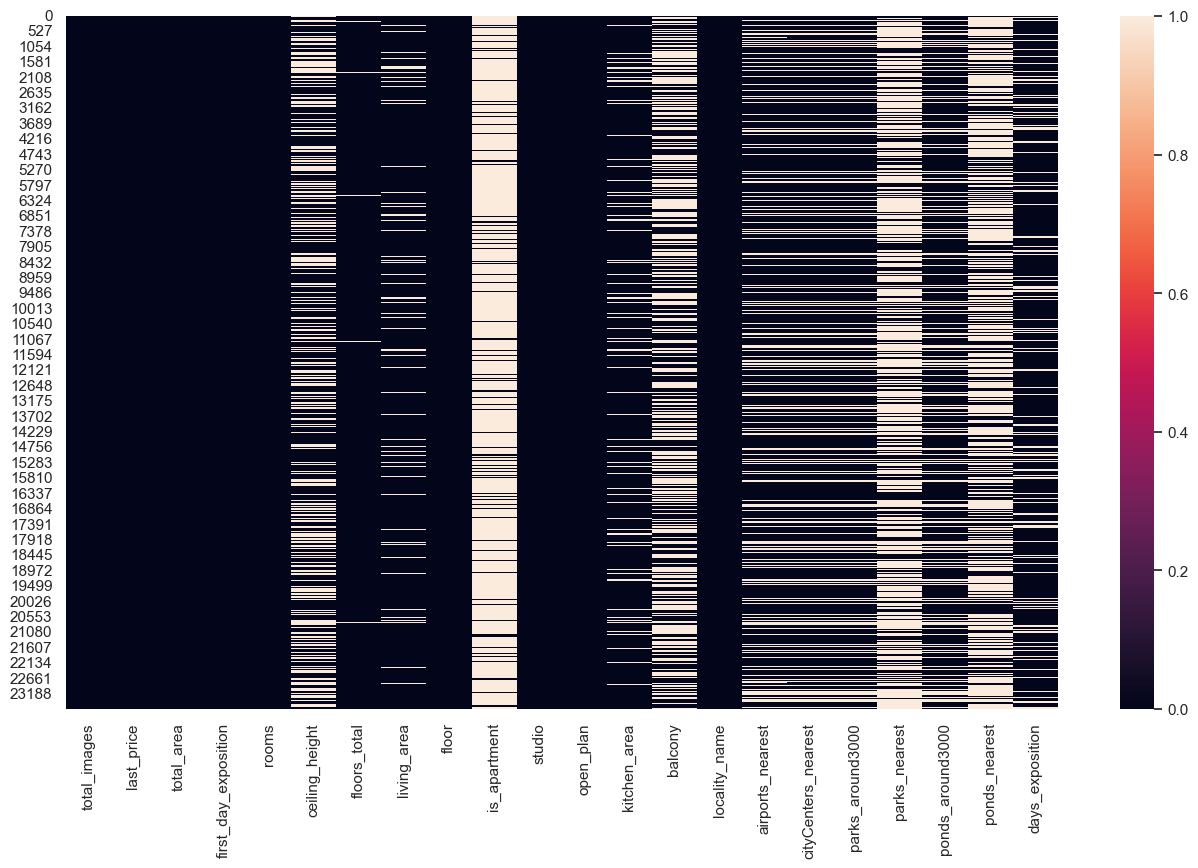

In [8]:
sns.heatmap(data.isna())
plt.show()

**Вывод:**

**Пропуски в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name` скорее всего из-за того что пользователь не ввел эти данные в форме подачи объявления.**

**А вот пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` скорее всего связаны с отсутсвием данных в геосервисах, откуда подгружалась эта информация. Пропуски в столбце `days_exposition` скорее всего допущены из-за ошибки сбора данных.**

В столбцах `is_apartment`, `balcony` пропуски можно заполнить логически. <br>
Заполним пропущенные занчения в этих столбцах нулем и False. Будем считать, что если в `is_apartment` пропущенное значение, то это не апартаменты. Если в столбце `balcony` пропущенное значение, то будем считать, что балконов нет.

In [9]:
data.is_apartment.fillna(False, inplace=True)
data.balcony.fillna(0, inplace=True)

#### Типы данных

#### Посмотрим в каком диапазоне лежат наши числовые переменные

In [10]:
data.describe().loc[['count', 'min', 'max']].T

,count,min,max
total_images,23699.0,0.0,50.0
last_price,23699.0,12190.0,763000000.0
total_area,23699.0,12.0,900.0
rooms,23699.0,0.0,19.0
ceiling_height,14504.0,1.0,100.0
floors_total,23613.0,1.0,60.0
living_area,21796.0,2.0,409.7
floor,23699.0,1.0,33.0
kitchen_area,21421.0,1.3,112.0
balcony,23699.0,0.0,5.0


Столбец `total_images`, `rooms`, `floor`, `is_apartment`, `balcony` можно привести к типу данных `uint8` для экономии памяти.

In [11]:
uint_columns = ['total_images', 'rooms', 'floor', 'balcony']
data[uint_columns] = data[uint_columns].astype('uint8')

Столбец `last_price`, `total_area`, `ceiling_height`, `floors_total`, `living_area`  можно привести к типу данных `float32` для экономии памяти

In [12]:
float_columns = ['last_price', 'total_area', 'ceiling_height', 
                 'floors_total', 'living_area', 'airports_nearest', 
                 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 
                 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'kitchen_area']
data[float_columns] = data[float_columns].astype('float32')

Столбец `first_day_exposition` можно привести к типу данных `datetime64` чтобы с датой было удобнее работать, а такжи с экономим память 

In [13]:
data.first_day_exposition = pd.to_datetime(data.first_day_exposition)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  uint8         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  uint8         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           21796 non-null  float32       
 8   floor                 23699 non-null  uint8         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float32       
 13  balcony         

**В результате приведения наших столбцов, размер наших данных сократился практически вдвое, а с датой теперь будет гораздо удобнее работать.**

#### Посмотрим уникальные значения в столбце locality_name

In [76]:
list(pd.Series(data.locality_name.unique()).dropna().sort_values())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 'деревня Горбунки

#### Заменим букву ё в названия на е и любые типы поселков сделаем просто поселками.

In [16]:
data.locality_name = (
data.locality_name.str.replace('ё', 'е')
    .str.replace('поселок городского типа', 'поселок')
    .str.replace('городской поселок', 'поселок')
    .str.replace('поселок станции', 'поселок')
    .str.replace('коттеджный поселок', 'поселок')
    .str.replace('поселок при железнодорожной станции', 'поселок')
)

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим в нашу таблицу:<br>
* цену за 1 кв.м.
* день недели где 0 - это понедельник, 1 - вторник и т.д.
* месяц публикации обьявления
* год публикации объявления
* тип этажа квартиры
* расстояние до центра города в километрах

In [17]:
data['square_meter'] = (data.last_price / data.total_area).round(2).astype('float32')

In [18]:
data['day_of_week'] = data.first_day_exposition.dt.day_of_week.astype('uint8')

In [19]:
data['month'] = data.first_day_exposition.dt.month.astype('uint8')

In [20]:
data['year'] = data.first_day_exposition.dt.year.astype('uint16')

In [21]:
def calculate_floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [22]:
data['floor_cat'] = data.apply(calculate_floor_cat, axis=1)

In [23]:
data['cityCenters_nearest_km'] = (data.cityCenters_nearest / 1000).round().astype('float32')

### Проведите исследовательский анализ данных

#### Посмотрим распределение общей площади

In [24]:
data_len_before = data.shape[0]

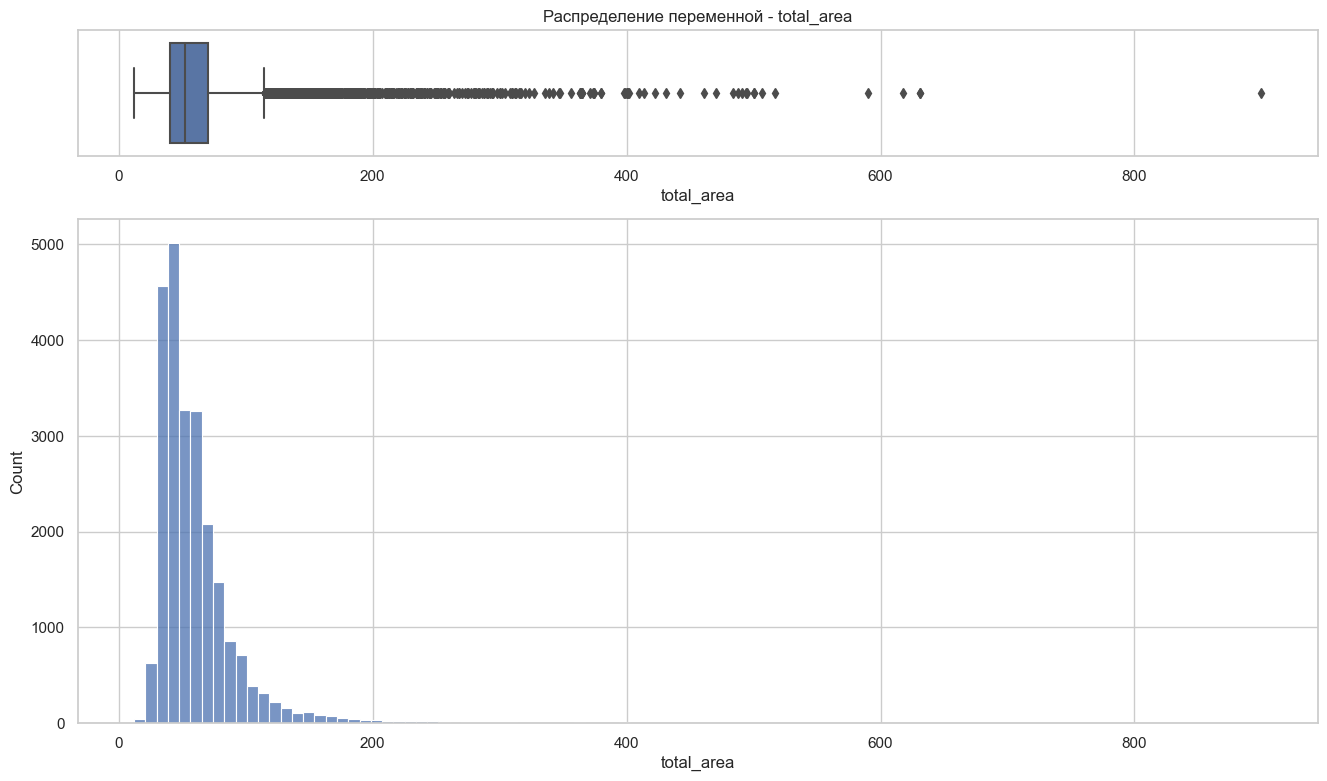

In [25]:
def plot_distribution(data, col, *, bins=50):
    f, ax = plt.subplots(nrows=2, ncols=1, sharex=False, gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(f'Распределение переменной - {col}')
    sns.boxplot(data=data, x=col, ax=ax[0], orient='h')
    sns.histplot(data=data, x=col, ax=ax[1], bins=bins)
    
    plt.show()


plot_distribution(data, 'total_area', bins=100)

**Мы видим, что в данных есть выбросы, элитная недвижимость очень сильно отличается в цене от типичной квартиры в нашей выборке. Давайте выбросим наблюдения больше 400 кв.м.**

In [26]:
data = data[data.total_area < 400]

#### Посмотрим распределение жилой площади.

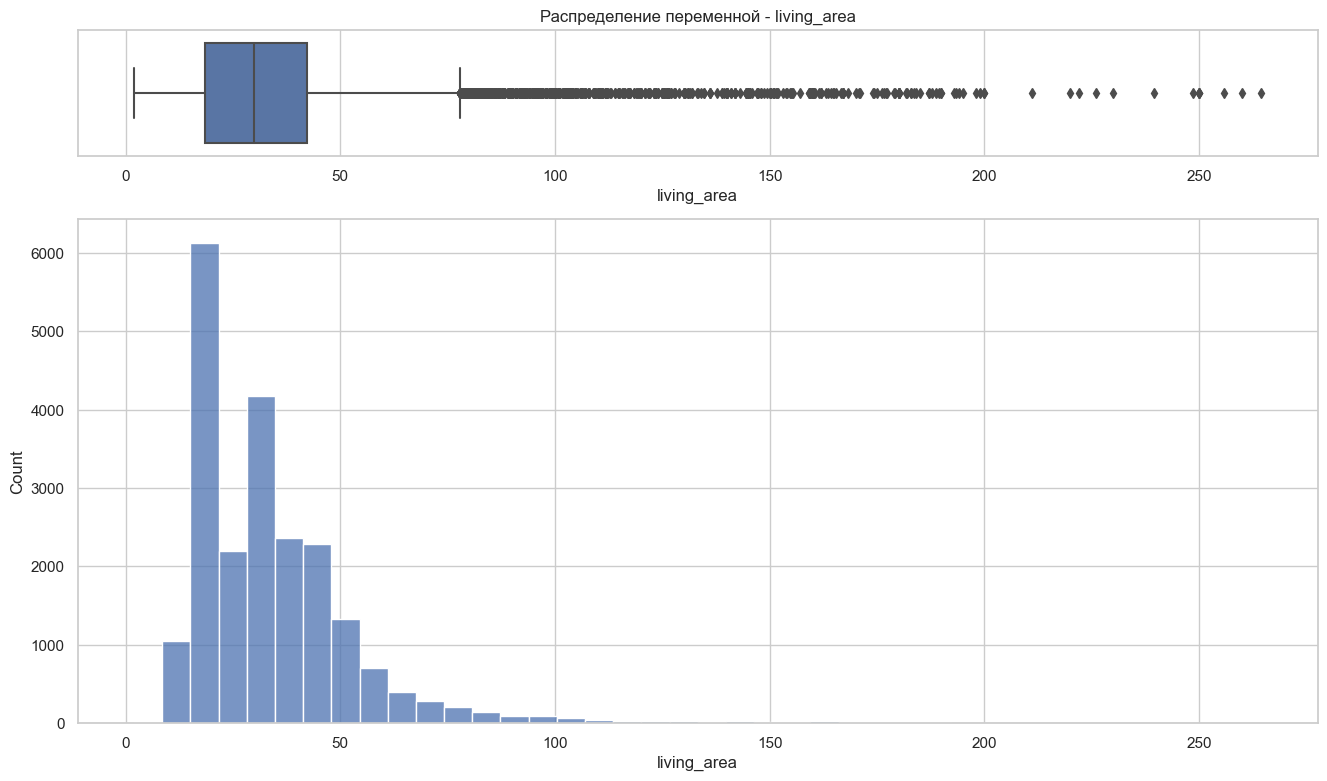

In [27]:
plot_distribution(data, 'living_area', bins=40)

**В переменной `living_area` есть выбросы, удалим значения больше 200 кв.м.**

In [28]:
data = data[(data.living_area < 200) | (data.living_area.isna())]

#### Посмотрим распределение переменной `kitchen_area`

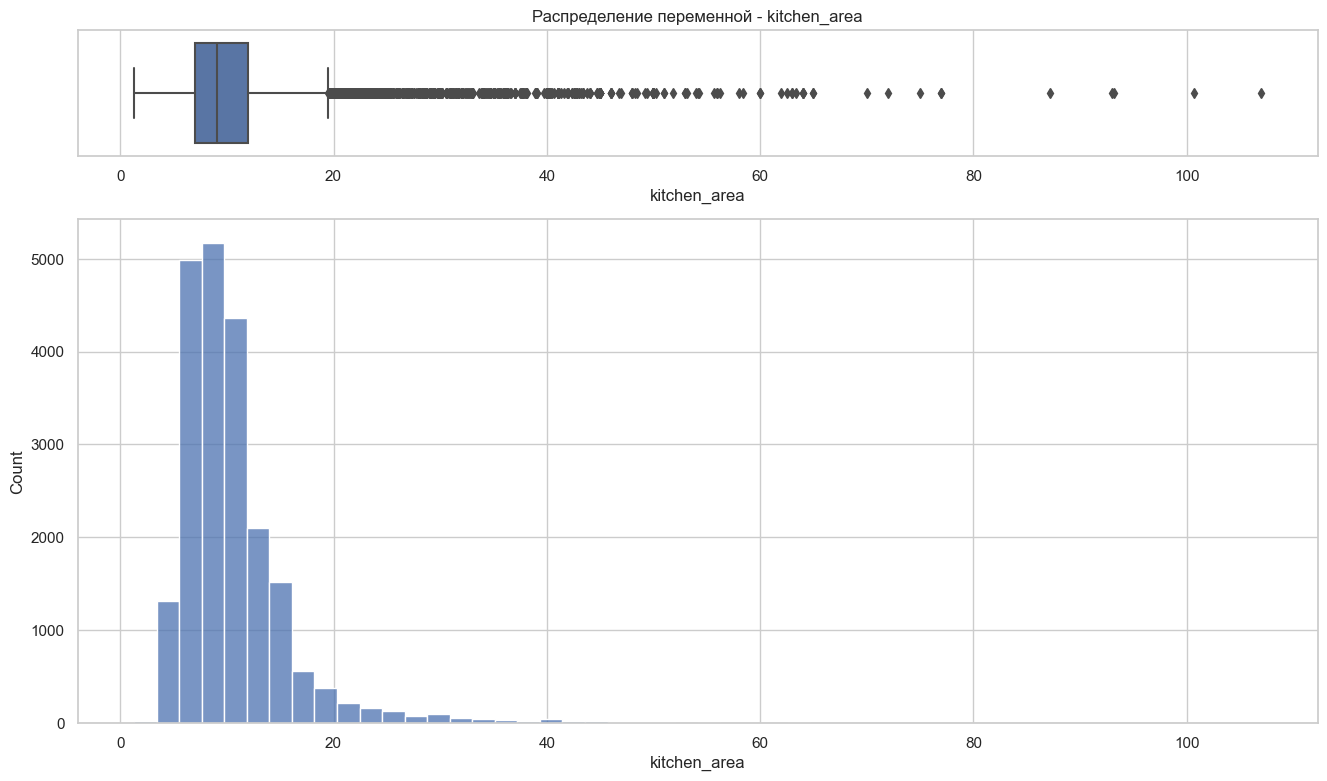

In [30]:
plot_distribution(data, 'kitchen_area')

**Площади кухонь также имеют выбросы удалим значения больше 50 кв.м.**

In [31]:
data = data[(data.kitchen_area < 50) | (data.kitchen_area.isna())]

#### Посмотрим распределение переменной `last_price`

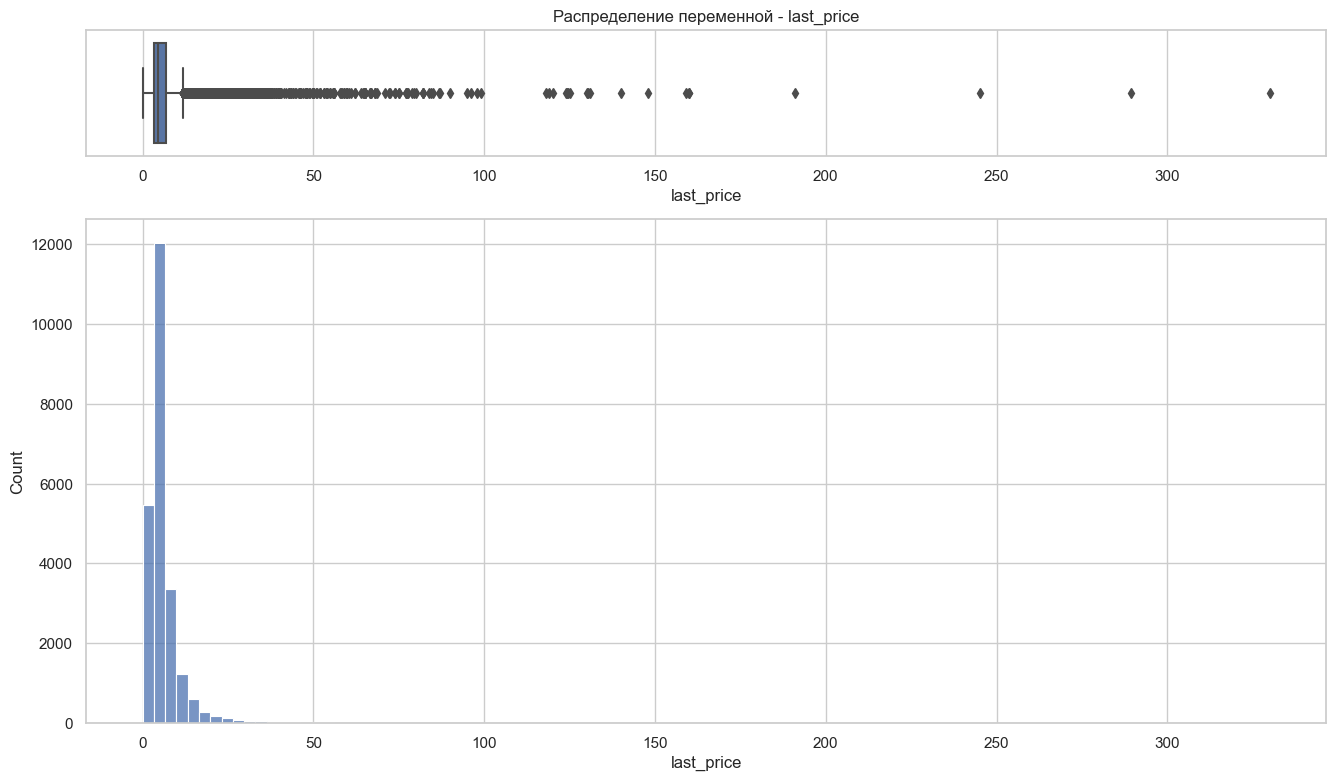

In [32]:
t_data = data.copy()
t_data['last_price'] /= 1e6
plot_distribution(t_data, 'last_price', bins=100)

**Удалим квартиры дороже 100 млн.**

In [33]:
data = data[data.last_price < 1e8]

#### Посмотрим на распределение высоты потолков

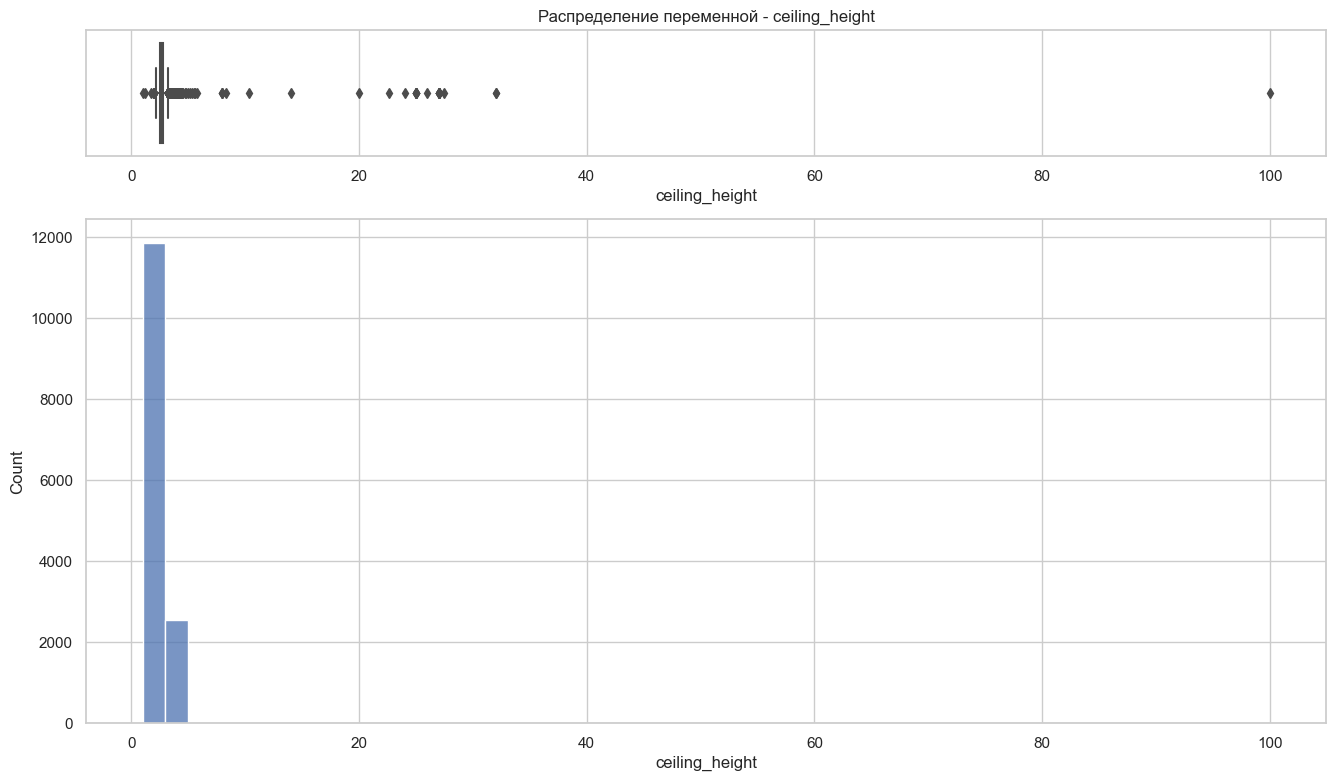

In [34]:
plot_distribution(data, 'ceiling_height')

##### Квартиры с высотой потолков менее 2,4 метров и более 4 как-то странно. Если высота потолка от 24 до 40 метров, то мы снизим высоту на один разряд. Если высота менее 2,4 метра мы ее увеличим до 2,4. Если высота от более 4 и менее 24 или более 40 мы присвоим ей медианное значение.

In [35]:
def calculate_ceiling_height(row, median):
    value = row['ceiling_height']
    if value >= 24 and value <= 40: 
        return value / 10
    elif value < 2.4:
        return 2.4
    elif value > 4 and value < 24 or value > 40:
        return median
    return value

In [36]:
median = data.ceiling_height.median()
data['ceiling_height'] = data.apply(axis=1, 
                                    func=calculate_ceiling_height, 
                                    median=median)

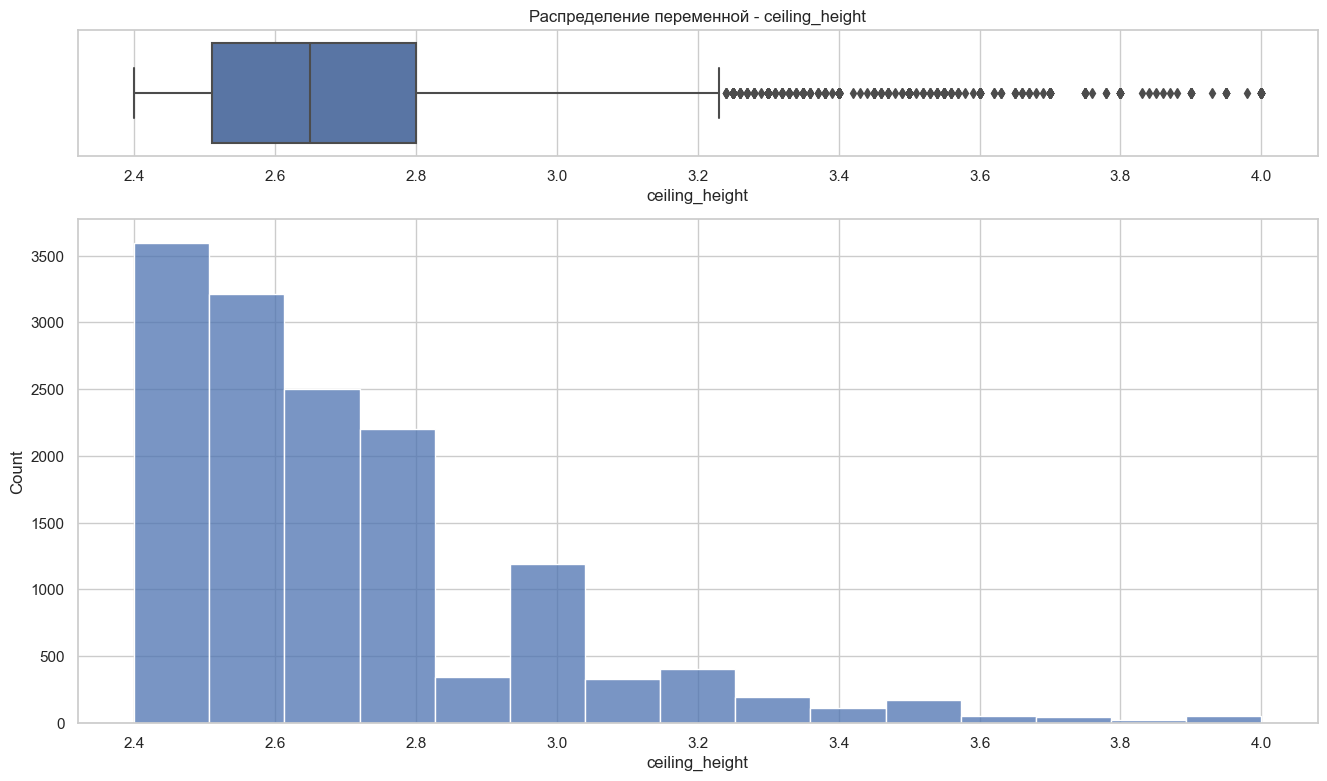

In [37]:
plot_distribution(data, 'ceiling_height', bins=15)

**Мы видим что основная часть наших наблюдений имеет высоту потолков от 2,4 до 3 метров.**

####  Посмотрим на распределения типа этажа.

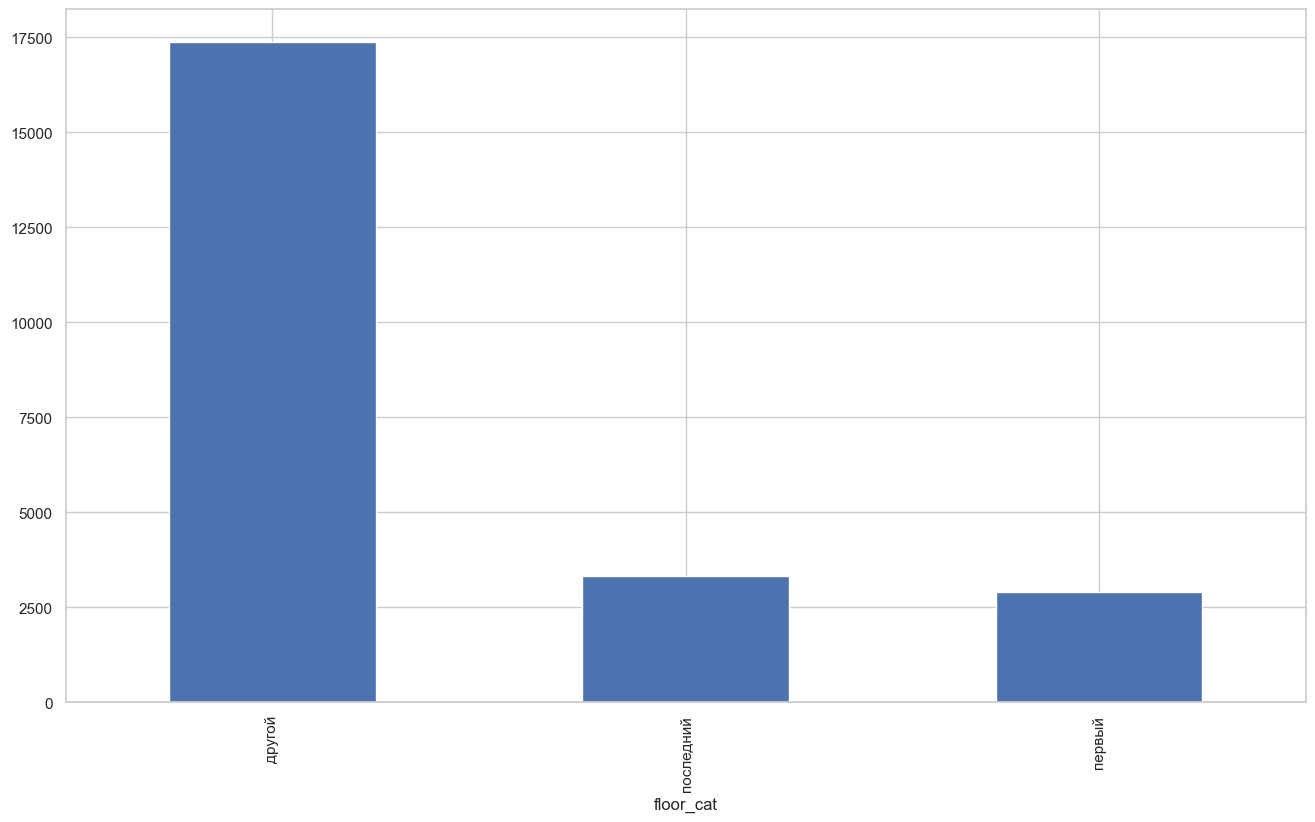

In [38]:
data.floor_cat.value_counts().plot(kind='bar')
plt.show()

**Последних и первых этажей намного меньше**

#### Посмотрим распределение, общего количества этажей.

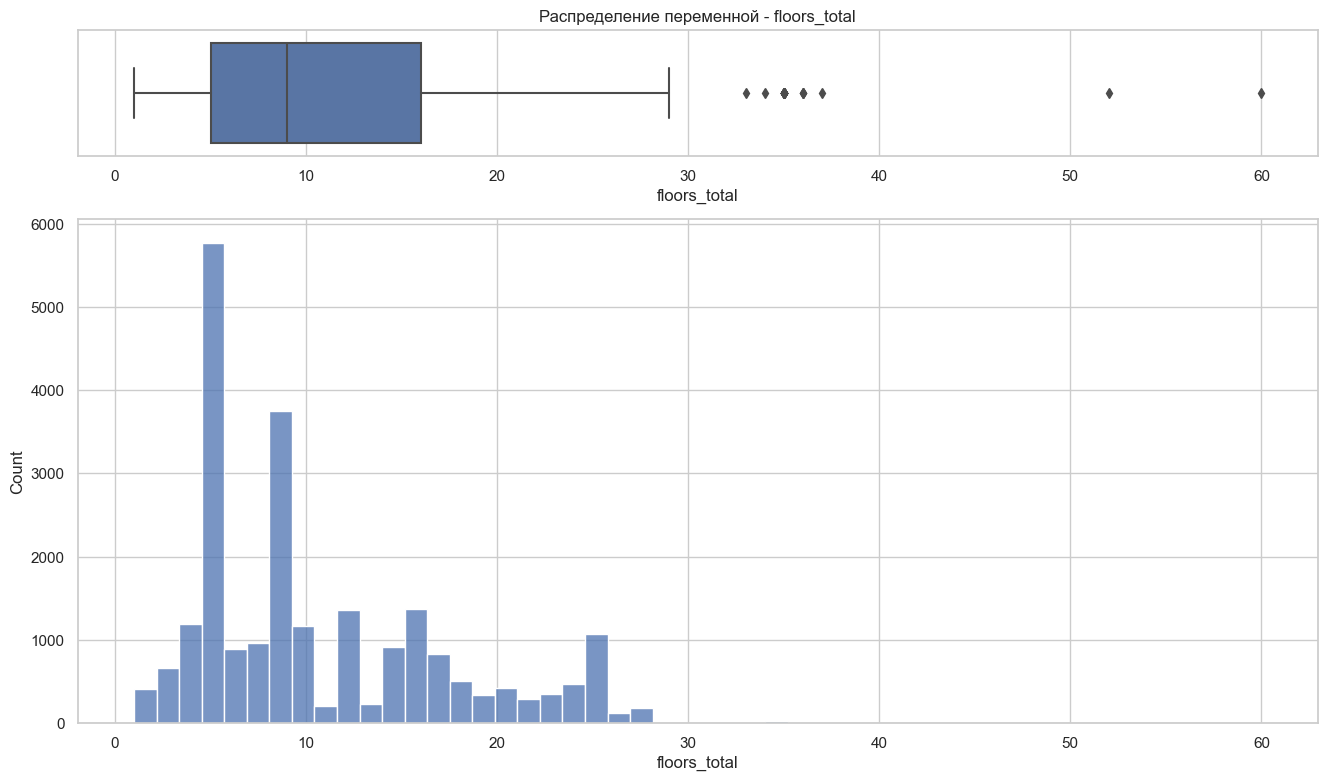

In [39]:
plot_distribution(data, 'floors_total')

**Похоже на правду, много девятиэтажек, и пятиэтажек. Удалим квартиры в домах с этажностью выше 30.**

In [40]:
data = data[(data.floors_total < 30) | (data.floors_total.isna())]

#### Посмотрим как распределяются наблюдения по количеству комнат

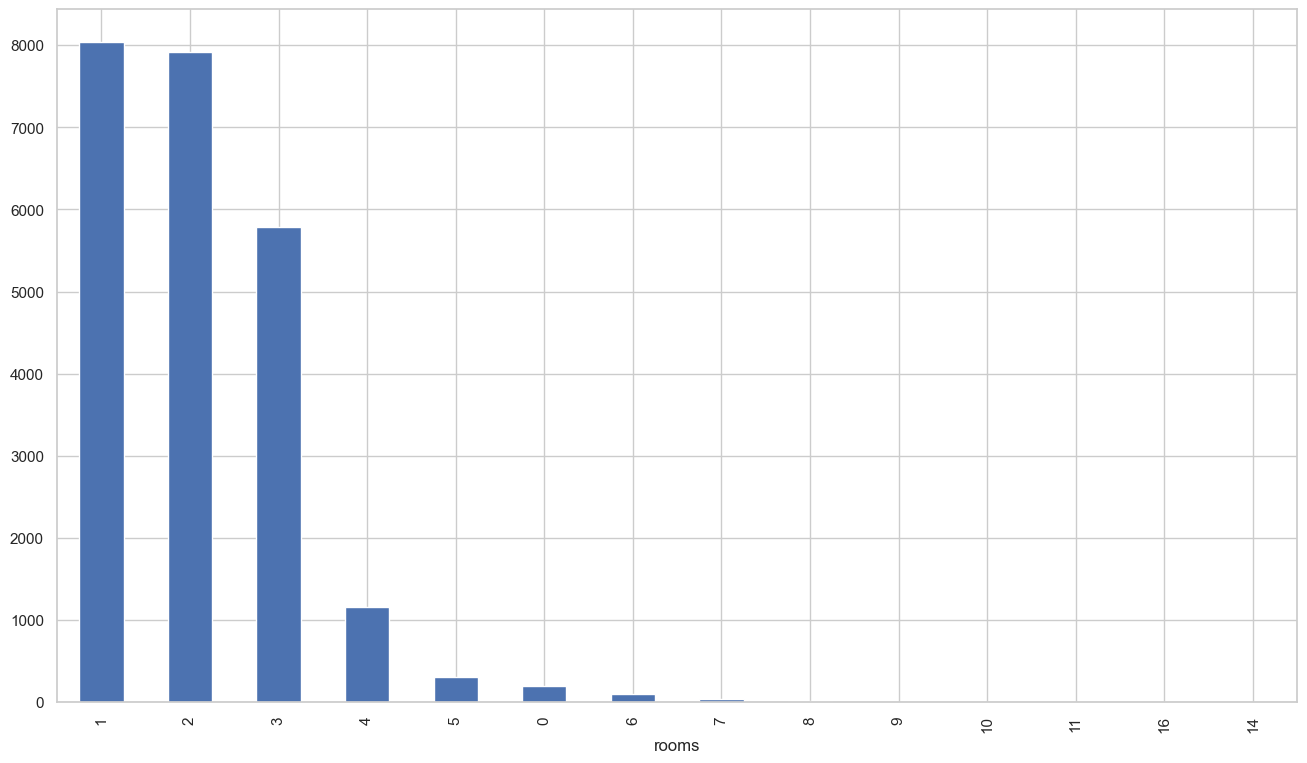

In [41]:
data.rooms.value_counts().plot(kind='bar')
plt.show()

**Основа наших наблюдений 1, 2, 3, 4, 5 комнатные квартиры. Удалим из наблюдений остальные квартиры.**

In [42]:
data = data[(data.rooms <= 5) & (data.rooms != 0)]

#### Посмотрим распределение расстояния до центра города.

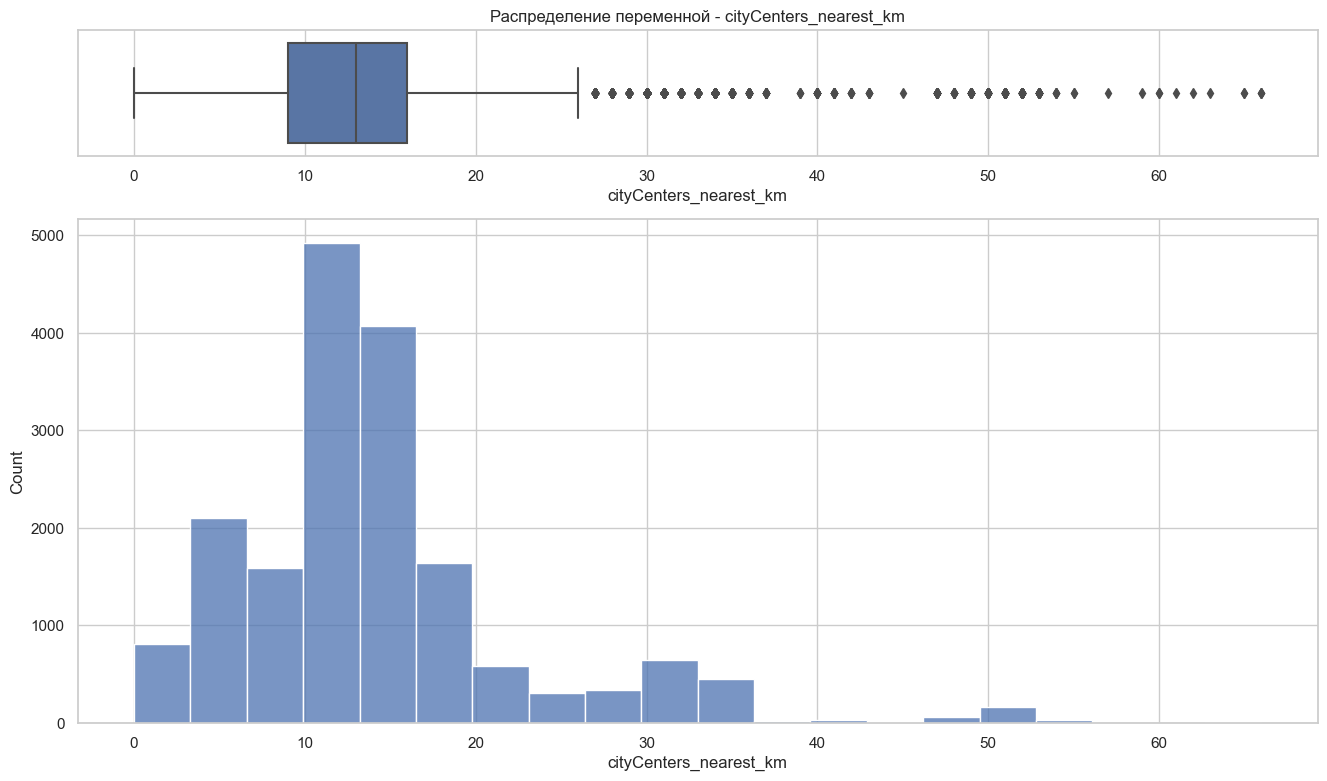

In [43]:
plot_distribution(data, 'cityCenters_nearest_km', bins=20)

**Мы видим что большинство наших наблюдений находится не дальше 40 километров от центра. Удалим выбросы.**

In [44]:
data = data[(data.cityCenters_nearest_km < 40) | (data.cityCenters_nearest_km.isna())]

#### Посмотрим распределение расстояния до ближайшего парка

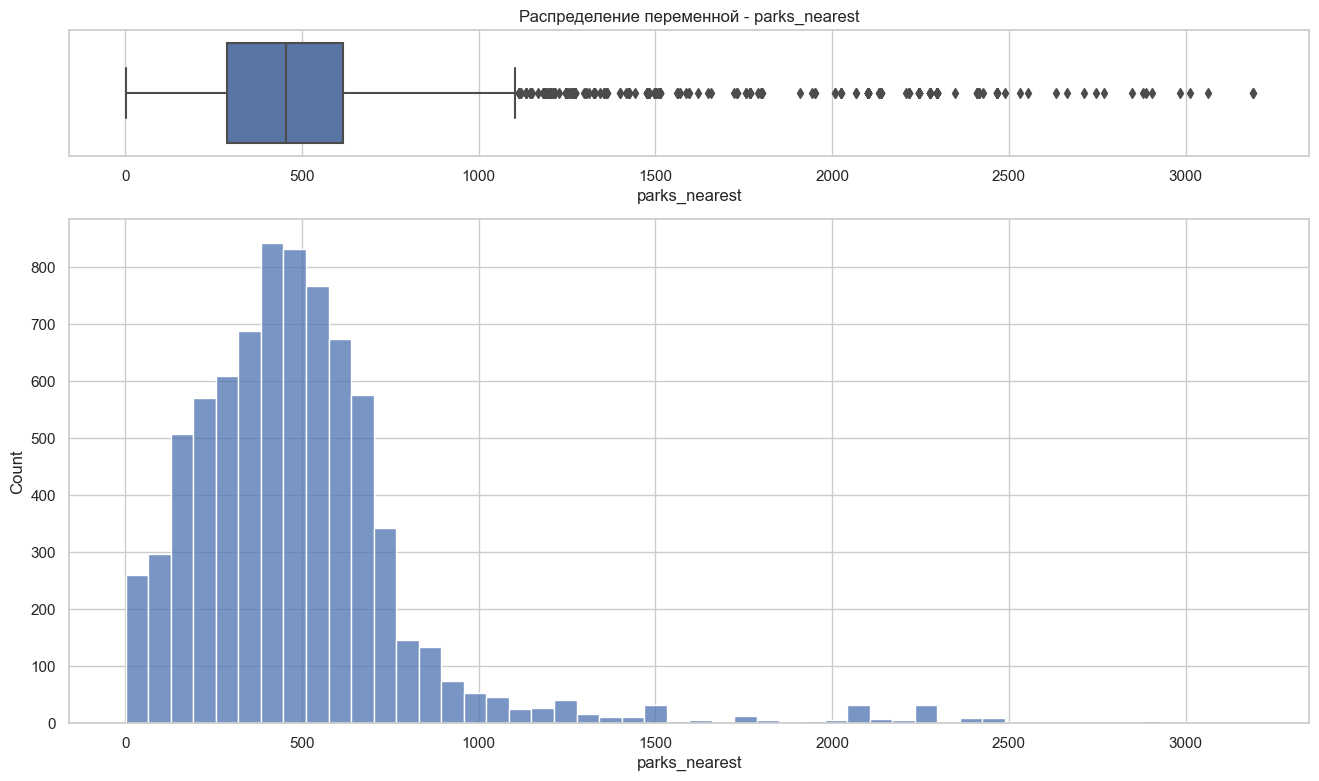

In [46]:
plot_distribution(data, 'parks_nearest')

**Основная часть наших наблюдений находится не далее 2км от парка. Удалим выбросы.**

In [47]:
data = data[(data.parks_nearest < 2000) | (data.parks_nearest.isna())]

In [51]:
print(f'После удаления выбросов мы потеряли - {1 - data.shape[0] / data_len_before:.2%} данных.')

После удаления выбросов мы потеряли - 3.88% данных.


#### Вывод:

1) **Распределение общей площади, жилой площади, площади кухни и цена похоже имеет высокие значения, это элитная недвижимость имеющая огромную площадь. Мы выбросили наблюдения сильно отличающиеся от типичных.**<br>
2) **Основная часть наших квартир имеет высоту потолков от 2,4 до 3 метров.**<br>
3) **В наших наблюдениях больше всего пятиэтажек и девятиэтажек.**<br>
4) **Основа нашей выборки состоит из 1, 2, 3, 4, 5 комнатных квартир.**<br>
5) **Основная часть объектов выборки находится на расстоянии менее чем 20 км от центра города.**<br>
6) **Множество объектов нашей выборки находится на расстоянии менее 1км от парка.**<br>

**Выбросы в наших данных были удалены и мы потеряли менее 4% данных.**


**В столбце `ceiling_height` были аномально низкие и аномально высокие значения. Эти значения были заменены. Аномально низкие на высоту 2,4, наблюдения в диапазоне 24 - 40 метров уменьшены на один порядок, а остальные аномальные наблюдения заменены медианой.**

#### Изучим насколько быстро продавались квартиры

##### Посмотрим распределение `days_exposition`

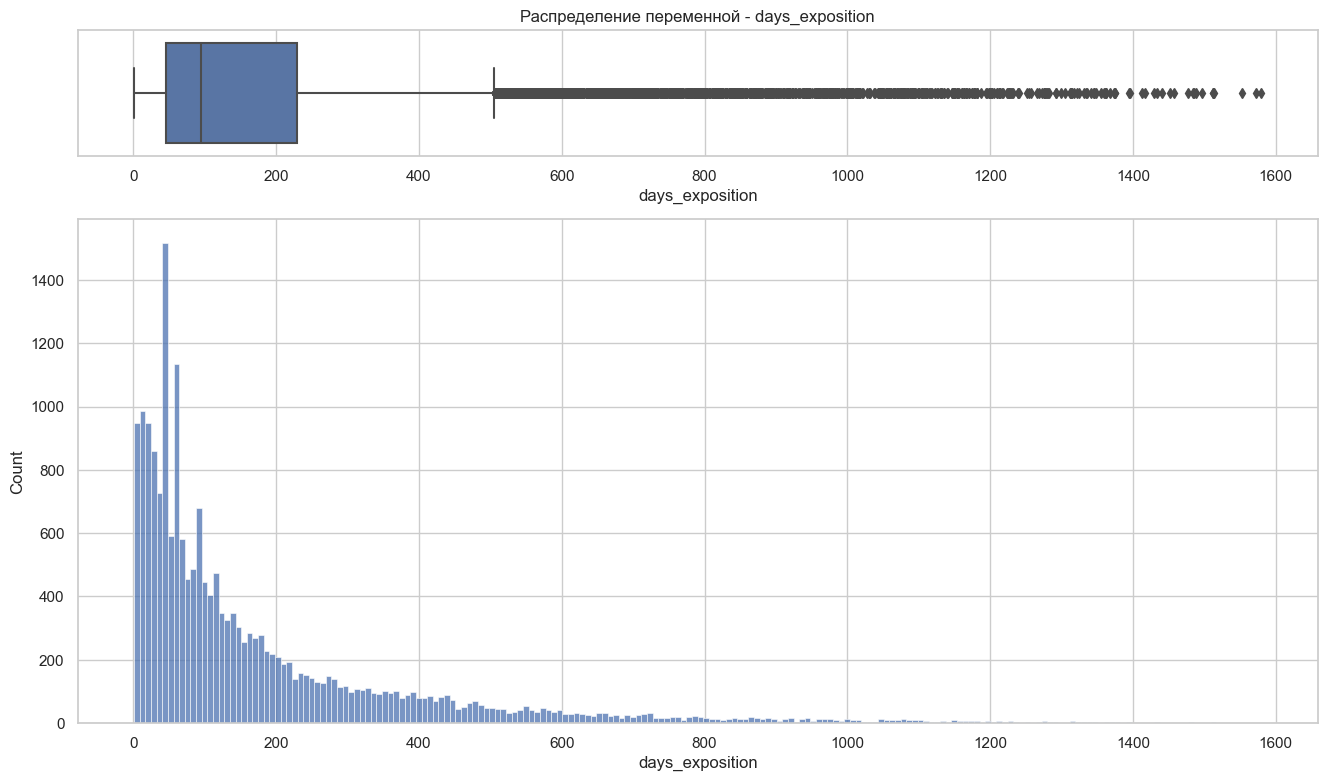

In [52]:
plot_distribution(data, 'days_exposition', bins=200)

##### Посчитаем среднее и медиану `days_exposition`

In [53]:
print(f'Среднее - {data.days_exposition.mean()}')
print(f'Медиана - {data.days_exposition.median()}')

Среднее - 179.4906005859375
Медиана - 95.0


#### Вывод:

**Мы видим, что медиана лучше характеризует наше типичное значение. Поэтому мы можем сказать, что обычно продажа квартиры занимает около 3, 4 месяцев. Квартира продалась быстро, если ее продажа заняла менее месяца, и квартира продается долго если ее объвление висит 5 месяцев и более.**

#### Посмотрим какие факторы влияют стоимость объекта

In [54]:
def plot_dependence(data, column, *, alpha=0.1):
    sns.scatterplot(data=data, x='last_price', y=column, alpha=0.5)
    print(f'Коэффициент кореляции Пирсона - {data.last_price.corr(data[column]):.3f}')
    plt.xlim(0, data.last_price.quantile(0.99))
    plt.ylim(0, data[column].quantile(0.99))
    plt.title(f'Влияние {column} на цену квартиры')
    plt.show()

##### Оценим влияние `total_area`

Коэффициент кореляции Пирсона - 0.751


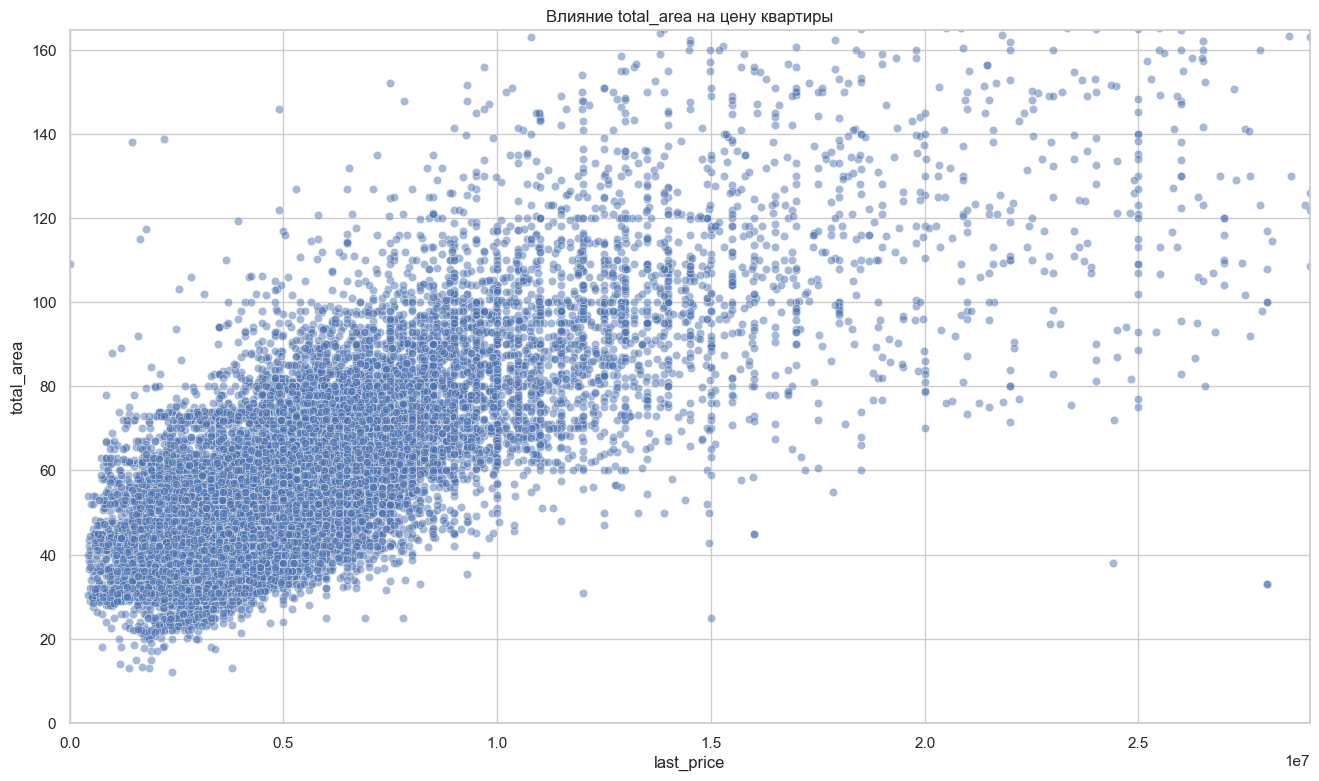

In [55]:
plot_dependence(data, 'total_area')

**Мы видим линейную зависимость между ценой и общей площадью. При увеличении общей площади растет и цена, о чем нам говорит положителный коэффициент корреляции.**

##### Оценим влияние `living_area`

Коэффициент кореляции Пирсона - 0.655


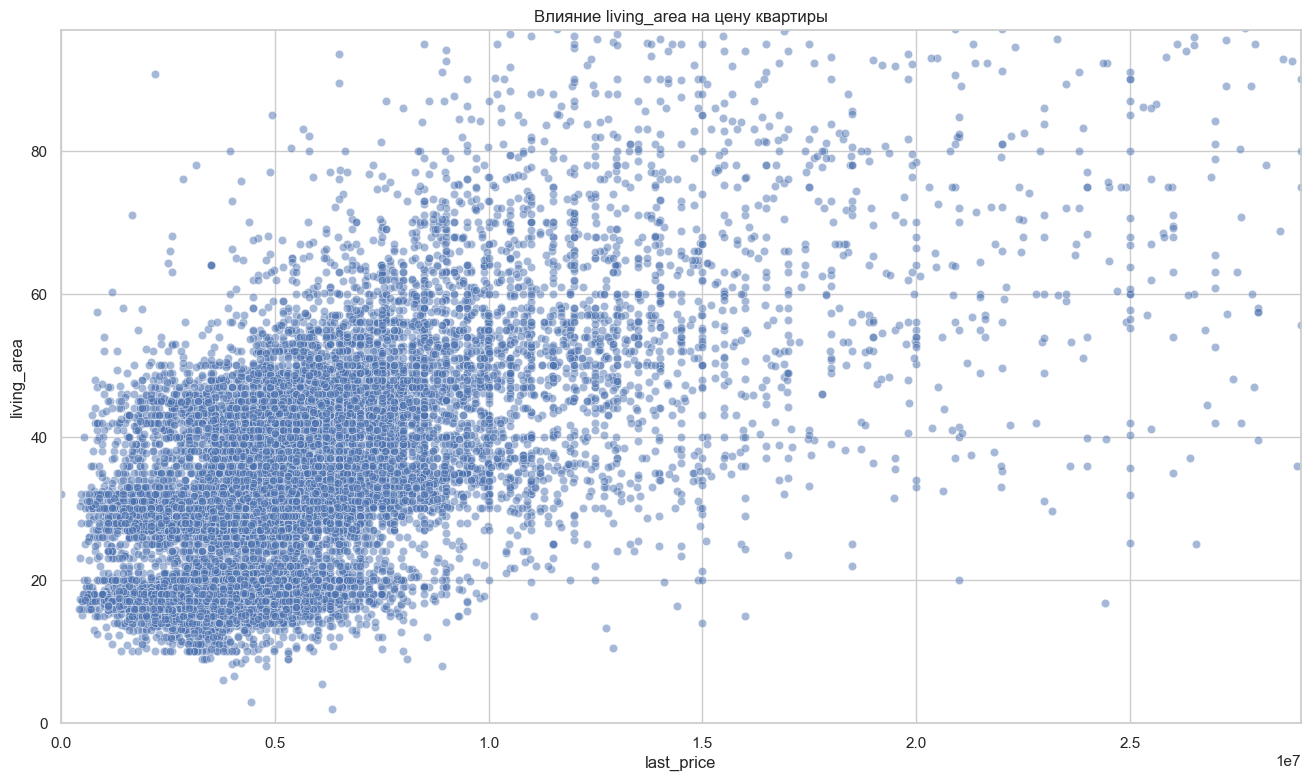

In [56]:
plot_dependence(data, 'living_area')

**Влияние `last_price` на целевую переменную такое же как и влияние общей площади.**

##### Оценим влияние `kitchen_area`

Коэффициент кореляции Пирсона - 0.543


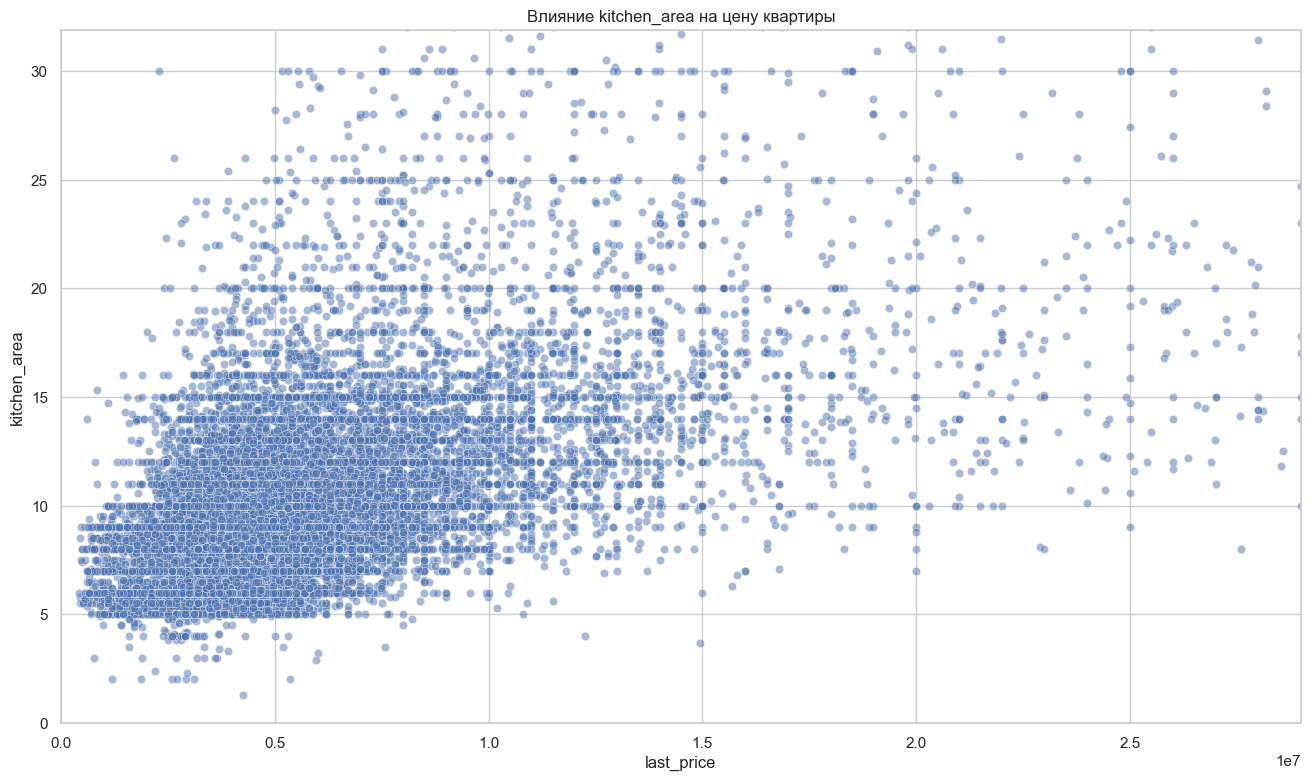

In [57]:
plot_dependence(data, 'kitchen_area')

**Кореляция уже заметно ниже чем с общей площадью и жилой площадью, но все же она сильная.**

In [58]:
def plot_dependence_cat(data, column, *, lim=0.99):
    sns.boxplot(data=data, y='last_price', x=column)
    plt.ylim(0, data.last_price.quantile(lim))
    plt.title(f'Влияние {column} на цену квартиры')
    plt.show()

##### Оценим влияние `rooms`

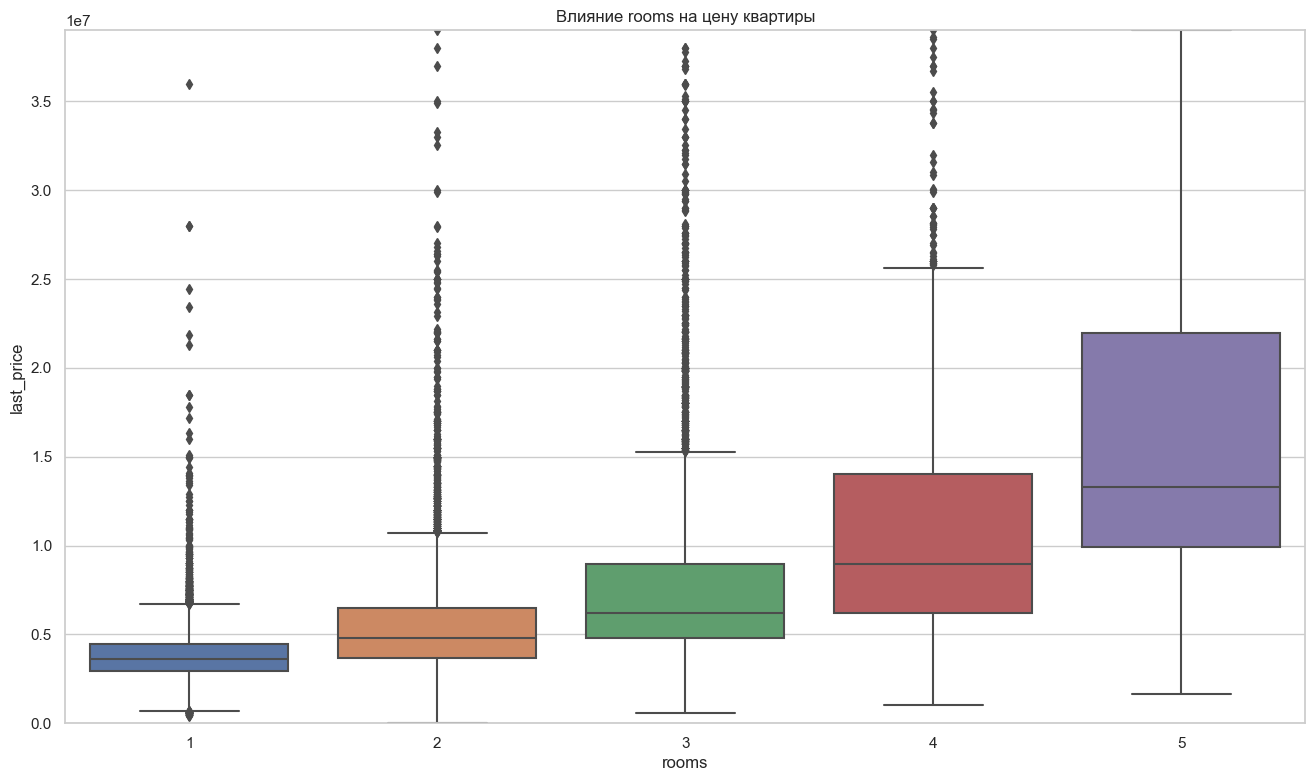

In [59]:
plot_dependence_cat(data, 'rooms', lim=0.995)

**Влияние количества комнат на целевую присутствует.**

##### Оценим влияние `floor`

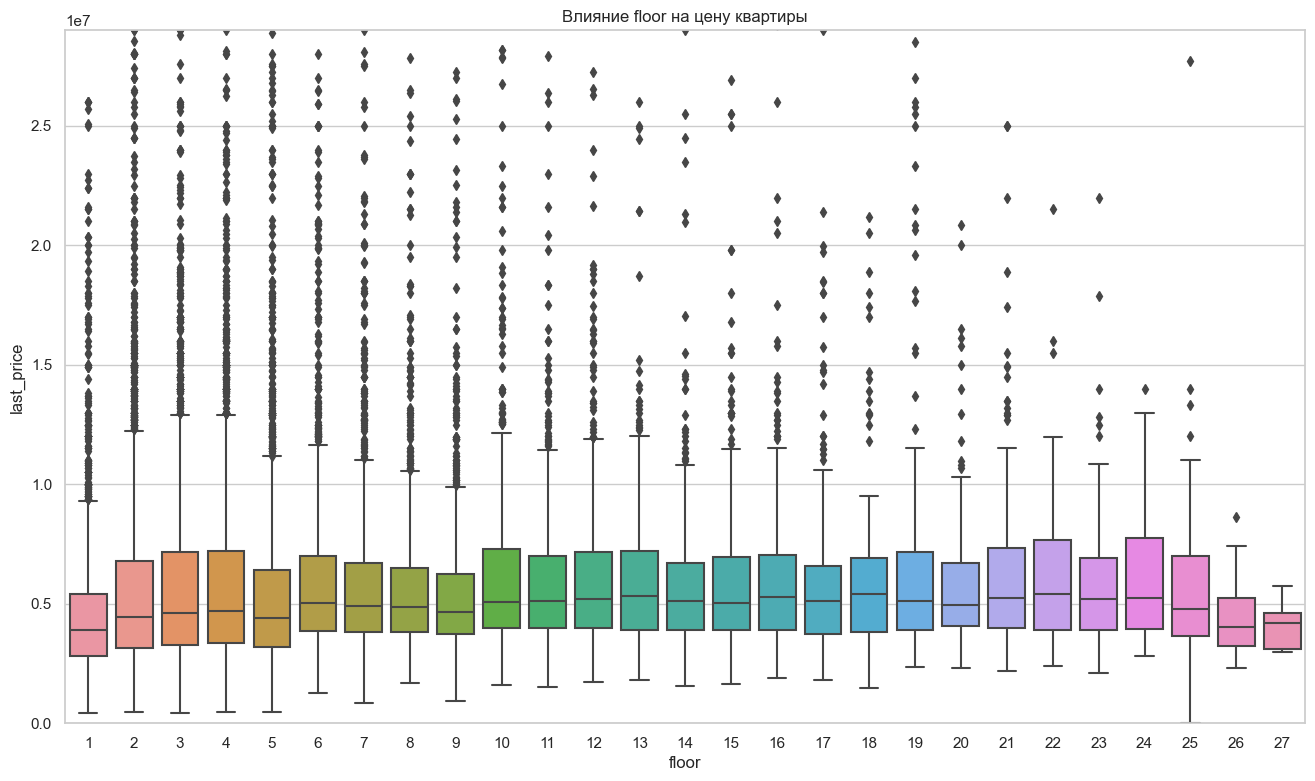

In [60]:
plot_dependence_cat(data, 'floor')

**Сначала с увеличением этажа у нас наблюдается рост цен на квартиры, с 6 по 24 этаж некоторая стабилизация, а выше 24 снижение цены. Также мы можем заметить, что при увеличении этажа становится меньше элитных квартир.**

##### Оценим влияние `floor_cat`

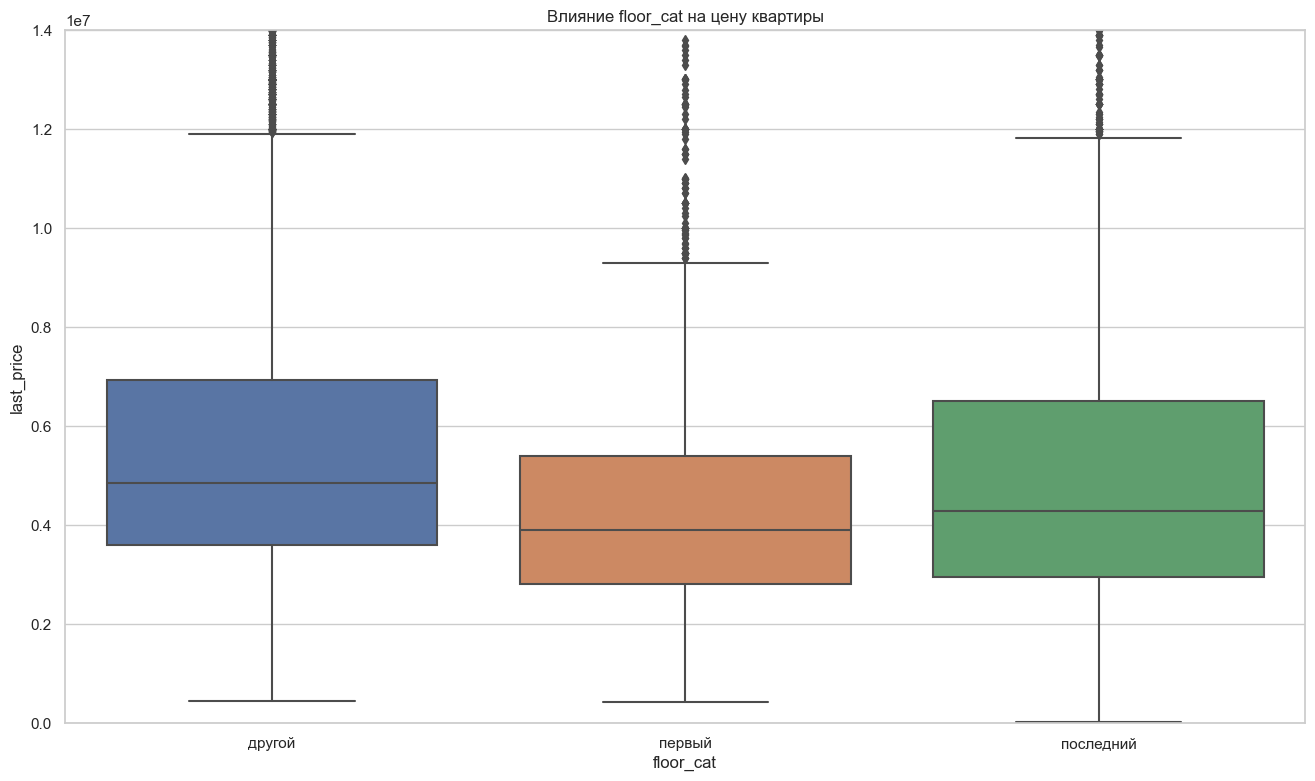

In [61]:
plot_dependence_cat(data, 'floor_cat', lim=0.95)

**Как мы видим квартиры находящиеся на первом и последнем этаже, при прочих равных, стоят дешевле. А также квартиры на первом этаже немного дешевле квартир, находящихся на последнем этаже.**

##### Оценим влияние `first_day_exposition`

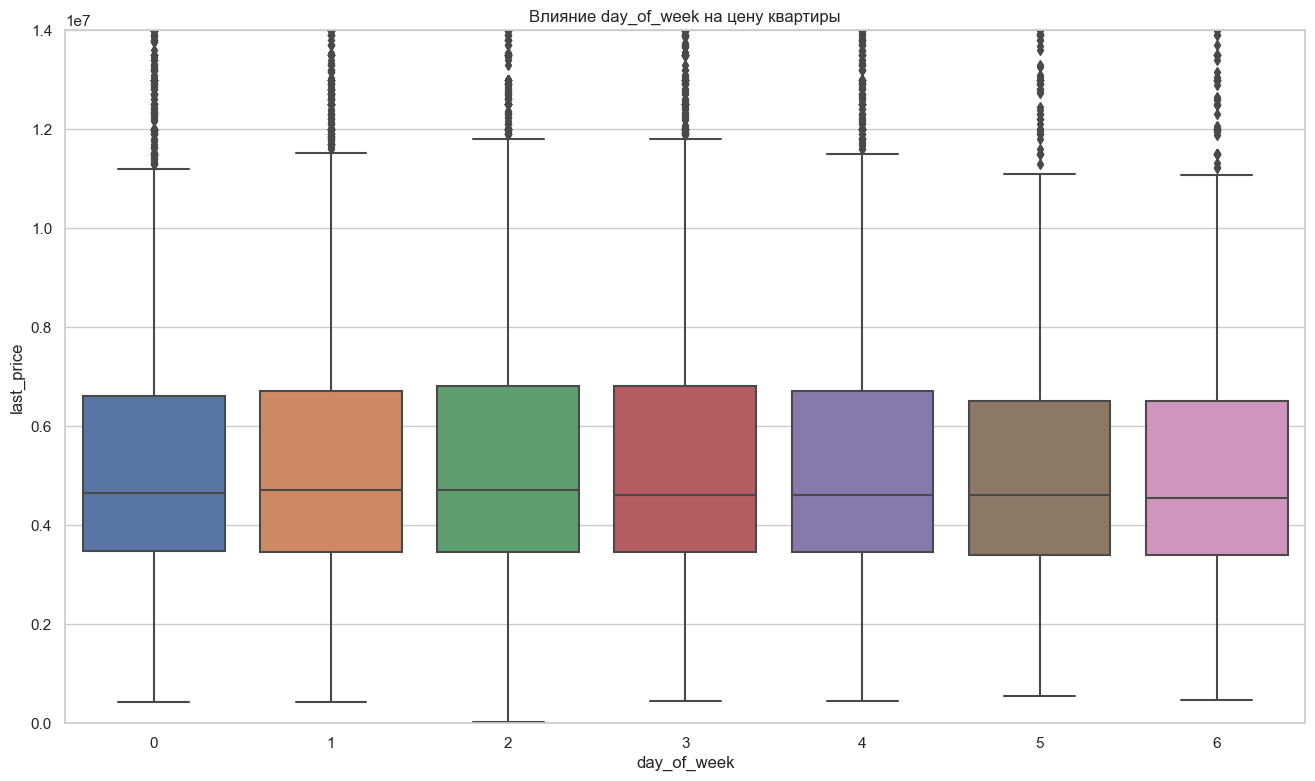

In [62]:
plot_dependence_cat(data, 'day_of_week', lim=0.95)

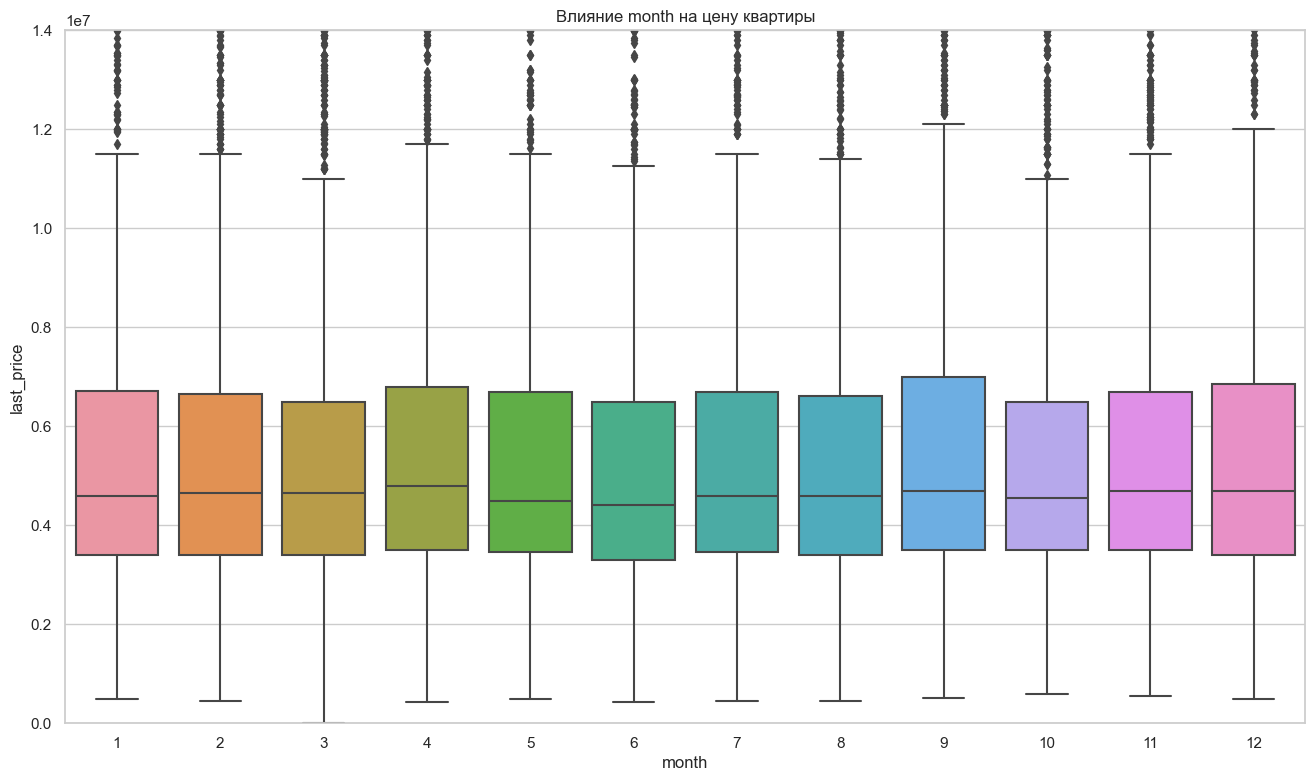

In [63]:
plot_dependence_cat(data, 'month', lim=0.95)

**Корреляция между днем недели, месяцем размещения объявления и ценой отсутствует**

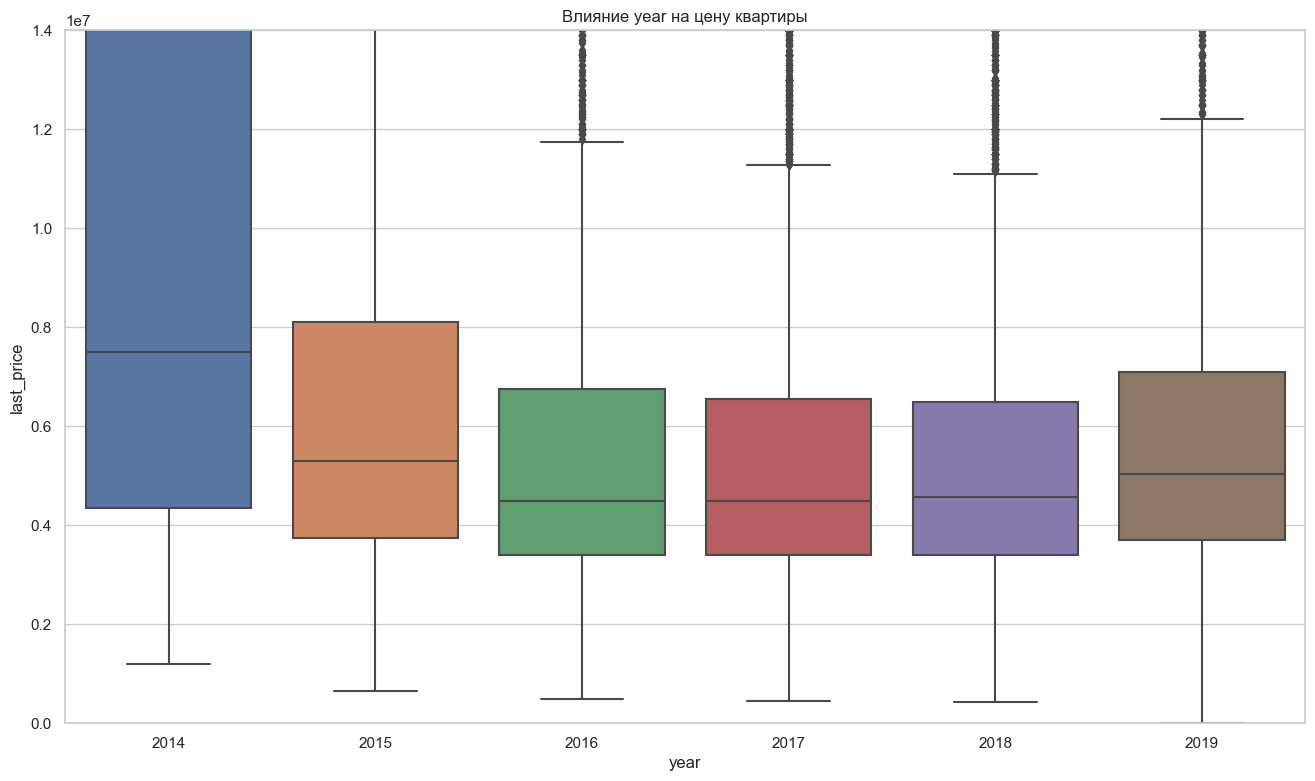

In [64]:
plot_dependence_cat(data, 'year', lim=0.95)

**Мы можем заметить с 2014 год по 2016 год тренд на снижение цен на недвижимость, а после 2018 года начинается рост.**

#### Вывод:

1) **Мы видим линейную зависимость между площадью кухни, жилой, общей площадью и ценой квартиры. При увеличении площади растет и цена, о чем нам говорит положителный коэффициент корреляции. Общая площадь коррелирует с ценой наиболее сильно.**<br>
2) **При увеличении количества комнат цены наших наблюдений растут.**<br>
3) **Сначала с увеличением этажа у нас наблюдается рост цен на квартиры, с 6 по 24 этаж некоторая стабилизация, а выше 24 снижение цены. Также мы можем заметить, что при увеличении этажа становится меньше элитных квартир.**<br>
4) **Квартиры находящиеся на первом и последнем этаже, при прочих равных, стоят дешевле. А также квартиры на первом этаже немного дешевле квартир, находящихся на последнем этаже.**
5) **День недели, и месяц размещения объявления никак не влияет на наш target.**<br>
6) **Мы можем заметить что с 2014 года по 2016 год мы наблюдали рост цен недвижимости, с 2016 по 2018 стабилизация цен, а после 2018 цены начали расти.**

#### Посмотрим средние цены 1 кв.м. по населенным пунктам.

In [65]:
price_stat = data.pivot_table(
    index='locality_name', 
    values='square_meter', 
    aggfunc=['count', 'mean']
)
price_stat.columns = 'количество', 'средняя цена'
price_stat = price_stat.sort_values(
    by='количество', 
    ascending=False)[:10]
display(price_stat.style.format(
    "{:.2f}", 
    subset=['средняя цена']
).background_gradient(
    cmap='Reds', 
    subset=['средняя цена'] , 
    axis=0
))

,количество,средняя цена
locality_name,,
Санкт-Петербург,15212,112858.54
поселок Мурино,528,85001.73
поселок Шушары,436,78405.73
Всеволожск,392,68618.02
Пушкин,363,103020.08
Колпино,335,75233.98
поселок Парголово,322,90448.42
Гатчина,307,68746.15
деревня Кудрово,283,92297.22


#### Вывод:

**Получается, что самая дорогая недвижимость в Санкт-Петербурге и Пушкине, а самая дешевая в Выборге.**

#### Посмотрим как меняется цена квадратного метра отдаляясь от центра Санкт-Петербурга

In [67]:
peter = (data[(data.locality_name == 'Санкт-Петербург') &
              (data.cityCenters_nearest_km != 0)])
peter_stat = peter.pivot_table(index='cityCenters_nearest_km', 
                               values='square_meter', 
                               aggfunc=['mean', 'median'])
peter_stat.columns = ['среднee', 'медиана']
display(peter_stat.style.format(
    "{:.2f}", 
    subset=['среднee', 'медиана']
).background_gradient(
    cmap='Reds', 
    subset=['среднee', 'медиана'] , 
    axis=0
))

,среднee,медиана
cityCenters_nearest_km,,
1.000000,154826.34,127586.14
2.000000,149287.56,122448.98
3.000000,121813.95,109878.05
4.000000,128479.29,118055.55
5.000000,136533.66,126923.08
6.000000,144783.67,130046.12
7.000000,152779.08,126226.36
8.000000,124520.18,122382.96
9.000000,111655.41,105322.76


**Мы наблюдаем что недвижимость, отдаляясь от центра города постепенно дешевеет. Мы наблюдаем на расстоянии 6, 7 км от центра опять повышение цен. И на расстоянии 27 км опять высокие цены.**

### Общий вывод

**Мы имеем пропуски в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name` скорее всего из-за того что пользователь не ввел эти данные в форме подачи объявления.**

**Также мы имеем пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. Эти пропуски скорее всего связаны с отсутсвием данных в геосервисах, откуда подгружалась эта информация. Пропуски в столбце `days_exposition` скорее всего допущены из-за ошибки сбора данных.**

**В названиях населенных пунктов было много дубликатов(один населенный пункт записанный по-разному)**

**Распределение общей площади, жилой площади, площади кухни и цена похоже имеет высокие значения, это скорее всего элитная недвижимость имеющая огромную площадь. Основная часть наших квартир имеет высоту потолков от 2,4 до 3 метров. В наших наблюдениях больше всего пятиэтажек и девятиэтажек. Основа нашей выборки состоит из 1, 2, 3, 4 комнатных квартир. Основная часть объектов выборки находится на расстоянии менее чем 20 км от центра города. Множество объектов нашей выборки находится на расстоянии менее 1км от парка.** **В столбце `ceiling_height` были аномально низкие и аномально высокие значения. Эти значения были заменены. Все выбросы были удалены.**

**Обычно продажа квартиры занимает около 3, 4 месяцев. Квартира продалась быстро, если ее продажа заняла менее месяца, и квартира продается долго если ее объвление висит 5 месяцев и более.**

**Мы Обнаружили линейную зависимость между площадью кухни, жилой, общей площадью и ценой квартиры. С ростом количества комнат цена квартиры растет. Сначала с увеличением этажа у нас наблюдается рост цен на квартиры, с 6 по 24 этаж некоторая стабилизация, а выше 24 снижение цены. Также мы можем заметить, что при увеличении этажа становится меньше элитных квартир. День недели, и месяц размещения объявления никак не влияет на наш target. Мы можем заметить что с 2014 года по 2016 год мы наблюдали рост цен недвижимости, с 2016 по 2018 стабилизация цен, а после 2018 цены начали расти.**

**Cамая дорогая недвижимость в Санкт-Петербурге и Пушкине, а самая дешевая в Выборге и Гатчине.**